In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv("car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
 #Step 3: Encode Categorical Variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # store encoders for possible inverse transform later

print("\nEncoded Dataset Preview:\n")
print(df.head())





Encoded Dataset Preview:

   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [5]:
# Step 4: Define Features (X) and Target (y)
# The target variable is usually 'class' (represents safety)
X = df.drop(columns=['unacc'])
y = df['unacc']


In [6]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Step 6: Initialize and Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Step 7: Make Predictions
y_pred = rf_model.predict(X_test)


In [9]:
# Step 8: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519

Confusion Matrix:
 [[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]]


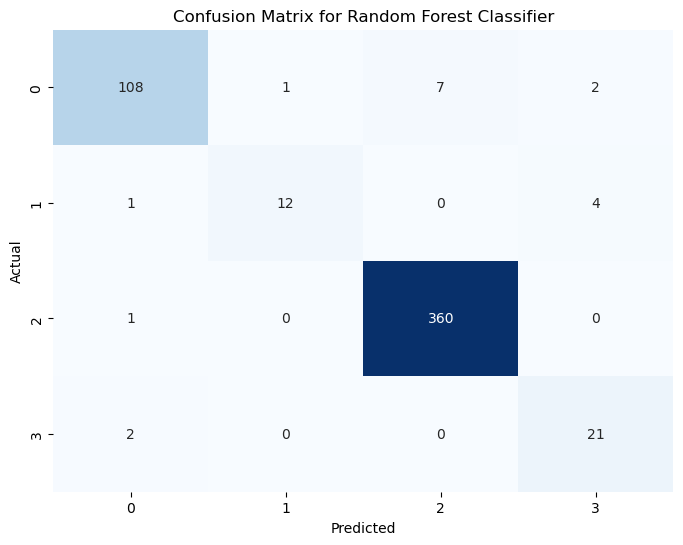

In [10]:
# Step 9: Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_271400\496073076.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


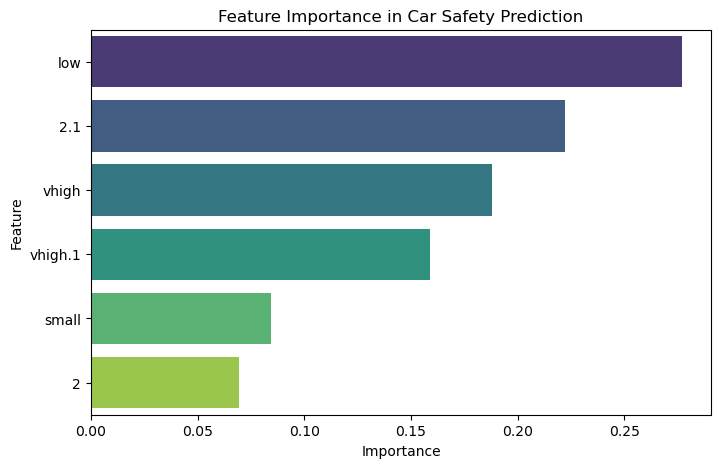

In [11]:
# Step 10: Feature Importance Visualization (Optional but Recommended)
importances = rf_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importance in Car Safety Prediction")
plt.show()
